In [ ]:
#Python NLP program that scrapes reviews of a particular hotel from Tripadvisor and performs
#sentiment analysis on the reviews 
#Technology used: Python 
#Packages: Beautiful Soup, Selenium, NLTK, Textblob, WordCloud

In [44]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
import requests
import datetime
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os
from selenium.common.exceptions import NoSuchElementException
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
from selenium.common.exceptions import ElementNotInteractableException

In [47]:
#Initial URL of the tripadvisor site
url = 'https://www.tripadvisor.in/Hotel_Review-g317098-d11695446-Reviews-Red_Fox_Hotel_Trichy-Tiruchirappalli_Tiruchirappalli_District_Tamil_Nadu.html'
r = requests.get(url)
r

<Response [200]>

In [ ]:
#browser = webdriver.Safari()

# makes the browser wait if it can't find an element
#browser.implicitly_wait(10)

#browser.get(url)
#browser.implicitly_wait(15)


In [48]:
urllist = []
urllist.append(url)

In [49]:
#This is an attempt to collect about a 100 reviews by scraping through 10 pages. 
#This below piece of code generates the URL for the 10 pages. Later these pages are scraped
# using Beautiful Soup

d = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
link = soup.find('a',attrs={"class":"ui_button nav next primary"})
url = link['href']

for i in d:
    pos1 = url.find('Reviews')
    url1 = url[:(pos1+7)] + '-or' + str(i) + url[(pos1+11):]
    urllist.append('https://www.tripadvisor.in'+url1)
    

#print(urllist)


In [50]:
#Call Beautiful Soup with the generated list of URLs. Collect all the reviews
reviewlist = []
for url in urllist:
    print(url)
    r = requests.get(url)
    print(r)
    soup = BeautifulSoup(r.content)
    reviewtxt = soup.find_all('q',attrs={'class':'XllAv H4 _a'})
    for i in range(0,len(reviewtxt)): 
        reviewlist.append(reviewtxt[i].text)   
    print(reviewtxt[0].text)    

https://www.tripadvisor.in/Hotel_Review-g317098-d11695446-Reviews-Red_Fox_Hotel_Trichy-Tiruchirappalli_Tiruchirappalli_District_Tamil_Nadu.html
<Response [200]>
We visited for temple tour from chennai had a fantastic stay here. Rooms are cleaned as per covid standard. All the common places they kept sanitizer🧴🤲. Recommended for all. Overall good Hospitality. Keep it up. ❤ Read more
https://www.tripadvisor.in/Hotel_Review-g317098-d11695446-Reviews-or5-Red_Fox_Hotel_Trichy-Tiruchirappalli_Tiruchirappalli_District_Tamil_Nadu.html
<Response [200]>
Check-in and Check out was uneventful.  The rooms were good and clean.  The room service was pretty quick.  The restaurant service was also quick, although the morning breakfast was minimal.  However considering these times, they made sure they served you what you wanted and in real quick time.
https://www.tripadvisor.in/Hotel_Review-g317098-d11695446-Reviews-or10-Red_Fox_Hotel_Trichy-Tiruchirappalli_Tiruchirappalli_District_Tamil_Nadu.html
<Resp

<Response [200]>
The hotel is located near the bus stand.The room I stayed in was pretty basic but clean.The WiFi was not working due to some password issues.The staff need to be more sensitive to guests .But overall value for money.
https://www.tripadvisor.in/Hotel_Review-g317098-d11695446-Reviews-or85-Red_Fox_Hotel_Trichy-Tiruchirappalli_Tiruchirappalli_District_Tamil_Nadu.html
<Response [200]>
I just stayed here with my group of 70 people. We all had a pleasant and wonderful stay. The location is just opposite of new bus stop and you can travel with local bus to old bus stop which opposite of shopping are. The bus fare is INR 8 per way. very convenient.
https://www.tripadvisor.in/Hotel_Review-g317098-d11695446-Reviews-or90-Red_Fox_Hotel_Trichy-Tiruchirappalli_Tiruchirappalli_District_Tamil_Nadu.html
<Response [200]>
I stayed here for two nights on a business trip.  It is the only branded chain hotel in town. The rooms are good and so is the food. The service is average. The buffet b

In [51]:
#generated list of reviews
len(reviewlist)

95

In [52]:
reviewlist

['We visited for temple tour from chennai had a fantastic stay here. Rooms are cleaned as per covid standard. All the common places they kept sanitizer🧴🤲. Recommended for all. Overall good Hospitality. Keep it up. ❤ Read more',
 'The rooms and bathrooms are neat and clean. Functional hotel. There is kettle and tea and coffee in the rooms The extra bed was comfortable.  Breakfast had limited options but that’s understandable considering it was served in room and low occupancy levels. The hotel has ample car parking as well one among few hotels to do so.',
 'We stayed last one month due to lock down felt home fell for every day. All the staff members was approachable  Especially Front office Mr. selva and SO Mr. Anbu  Extraordinary support gave us. Room service was good  Breakfast and dinner was so yummy',
 'House keeping persons were done to excellent services. Timely got the best services. Especially shanthi mam done very much clean work ontime and well disciplines . Thanks to redfox t

In [67]:
#Copy the reviews into a dataframe for further analysis
df = pd.DataFrame(reviewlist,columns=['Review'])

In [68]:
df.head(10)

,Review
0,We visited for temple tour from chennai had a ...
1,The rooms and bathrooms are neat and clean. Fu...
2,We stayed last one month due to lock down felt...
3,House keeping persons were done to excellent s...
4,"Stayed at redfox Hotel on transit, room was cl..."
5,Check-in and Check out was uneventful. The ro...
6,Have visited post lockdown and found the preca...
7,If you are in Trichy for a short stay to visit...
8,Hi stayed there for 2 days with family.. it wa...
9,Had a good experience. Stayed more than a week...


In [69]:
#Copy the reviews to a CSV file. This is to avoid scraping again and again. For further 
#use we could just read from the csv
df.to_csv('TripAdvisor_Reviews.csv')

In [57]:
 !pip install nltk

In [55]:
#import pandas as pd
df = pd.read_csv('TripAdvisor_Reviews.csv')

In [56]:
df.head()

,Unnamed: 0,Review
0,0,We visited for temple tour from chennai had a ...
1,1,The rooms and bathrooms are neat and clean. Fu...
2,2,We stayed last one month due to lock down felt...
3,3,House keeping persons were done to excellent s...
4,4,"Stayed at redfox Hotel on transit, room was cl..."


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  95 non-null     int64 
 1   Review      95 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [58]:
#Using NLTK package to do the sentiment analysis 
import nltk
from nltk.corpus import stopwords
#nltk.download()

In [59]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [60]:
stop_words = set(stopwords.words('english'))

In [61]:
#Remove the stopwords from the reviews. Create a separate column in dataframe called 
#Reviews1 to copy the updated reviews
df['Reviews1'] = ' '
for i in range(0,len(df)):
    word_tokens = word_tokenize(df['Review'][i])
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    str1 = ''
    for ele in filtered_sentence:
        str1 += ele + ' '
    word_tokens = word_tokenize(str1)
    punc_sentence = [w for w in word_tokens if w.isalpha()]
    #print(punc_sentence)
    str1 = ''
    for ele in punc_sentence:
        str1 += ele + ' '
    df['Reviews1'][i] = str1

<ipython-input-61-5d25e6ad65fd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews1'][i] = str1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  95 non-null     int64 
 1   Review      95 non-null     object
 2   Reviews1    95 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [67]:
#Assess the sentiment of the reviews using the below package
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#df['Sentiment'] = ''
sid_obj = SentimentIntensityAnalyzer() 

for i in range(0,len(df)):
    sentiment_dict = sid_obj.polarity_scores(df['Review'][i]) 
    #if sentiment_dict['compound'] >= 0.05 : 
    df['Sentiment'][i] = sentiment_dict['compound']
    #elif sentiment_dict['compound'] <= - 0.05 : 
      #  df['Sentiment'] = 0

df['Sentiment'] = df['Sentiment'].astype(float)

<ipython-input-67-a88da4b74add>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'][i] = sentiment_dict['compound']


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  95 non-null     int64  
 1   Review      95 non-null     object 
 2   Reviews1    95 non-null     object 
 3   Sentiment   95 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


In [73]:
#Copy the positive and negative reviews to separate dataframes

pos_df = df[df['Sentiment'] >= 0]
pos_df.reset_index(inplace=True)
neg_df = df[df['Sentiment'] < 0]
neg_df.reset_index(inplace=True)

In [74]:
pos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       88 non-null     int64  
 1   Unnamed: 0  88 non-null     int64  
 2   Review      88 non-null     object 
 3   Reviews1    88 non-null     object 
 4   Sentiment   88 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ KB


In [75]:
from collections import Counter

In [76]:
#Most 50 common positive words can be obtained by using the Counter package
pos_wordlist = Counter(" ".join(pos_df["Reviews1"]).split()).most_common(50)
pos_wordlist
#df1 = pd.DataFrame(wordlist,columns=['Labels','Frequency'])
#labels, values = zip(*wordlist.items())
#df1.head()

[('good', 78),
 ('hotel', 65),
 ('stay', 51),
 ('room', 45),
 ('staff', 38),
 ('service', 37),
 ('clean', 26),
 ('excellent', 24),
 ('also', 24),
 ('rooms', 22),
 ('Red', 22),
 ('well', 21),
 ('Fox', 21),
 ('stayed', 20),
 ('Trichy', 20),
 ('bus', 20),
 ('Hotel', 19),
 ('nice', 19),
 ('like', 18),
 ('comfortable', 17),
 ('work', 17),
 ('food', 16),
 ('housekeeping', 16),
 ('one', 14),
 ('breakfast', 14),
 ('visit', 14),
 ('Good', 14),
 ('keeping', 13),
 ('decent', 13),
 ('friendly', 13),
 ('day', 12),
 ('time', 12),
 ('would', 12),
 ('really', 12),
 ('services', 11),
 ('great', 11),
 ('restaurant', 11),
 ('people', 11),
 ('house', 11),
 ('Shanthi', 11),
 ('Room', 10),
 ('best', 10),
 ('much', 10),
 ('pleasant', 10),
 ('recommend', 10),
 ('staffs', 10),
 ('front', 10),
 ('Excellent', 10),
 ('place', 9),
 ('stand', 9)]

In [77]:
#Likewise below if the most 50 common negative words
neg_wordlist = Counter(" ".join(neg_df["Reviews1"]).split()).most_common(50)
neg_wordlist
#df1 = pd.DataFrame(wordlist,columns=['Labels','Frequency'])
#labels, values = zip(*wordlist.items())
#df1.head()

[('taste', 8),
 ('staff', 8),
 ('hotel', 6),
 ('time', 5),
 ('good', 5),
 ('restaurant', 4),
 ('food', 4),
 ('service', 3),
 ('stayed', 3),
 ('training', 3),
 ('stay', 3),
 ('rude', 3),
 ('social', 3),
 ('skills', 3),
 ('Food', 3),
 ('reception', 3),
 ('breakfast', 3),
 ('worst', 3),
 ('speak', 2),
 ('also', 2),
 ('times', 2),
 ('team', 2),
 ('young', 2),
 ('needs', 2),
 ('booked', 2),
 ('phone', 2),
 ('get', 2),
 ('person', 2),
 ('frustrated', 2),
 ('feel', 2),
 ('chicken', 2),
 ('weeks', 2),
 ('two', 2),
 ('unprofessional', 2),
 ('treat', 2),
 ('customers', 2),
 ('even', 2),
 ('manager', 2),
 ('however', 2),
 ('lacked', 2),
 ('space', 2),
 ('room', 2),
 ('trip', 2),
 ('decent', 2),
 ('eat', 2),
 ('safe', 1),
 ('ladies', 1),
 ('Front', 1),
 ('office', 1),
 ('man', 1)]

In [111]:
import matplotlib.pyplot as plt

In [23]:
#fig, ax = plt.subplots(figsize=(20, 10))
# plot horizontal bar plot
#df1.sort_values(by='Frequency').plot.barh(x="Labels", y="Frequency", ax=ax)
# set the title
#plt.title("Most Common words in positive corpus")
#plt.show()

In [35]:
pos_df.head()
pos_df.info()
pos_df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 94
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   Review      88 non-null     object 
 2   Reviews     88 non-null     object 
 3   Reviews1    88 non-null     object 
 4   Sentiment   88 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.1+ KB


,Unnamed: 0,Review,Reviews,Reviews1,Sentiment
89,89,"I stayed at Red Fox for 3 nights, This is a de...",,stayed Red Fox nights decent hotel Business tr...,0.2732
91,91,One of the best hotels in trichy with good amb...,,One best hotels trichy good ambiance friendly ...,0.9571
92,92,Very gd.excellent.lobby staff all are equally ...,,staff equally nice humble tivvya also gd keepi...,0.9211
93,93,Very clean and peacefull atmosphere.worth for ...,,clean peacefull money Good staff really staffs...,0.9459
94,94,Ms. Shanti was really helpful and friendly and...,,Shanti really helpful friendly work super good...,0.9886


In [94]:
#Lets use ngrams to extract meaningful phrases from the reviews instead of single words. 
#These phrases should give a better insight into what aspects about the hotel made the 
#customers happy or unhappy and where better service can be rendered to improve 
#customer satiafaction

#Lets begin with bigrams 
from nltk import bigrams

bigramwords = []
for i in range(0,len(pos_df)):
    string_bigrams = bigrams(pos_df['Reviews1'][i].split(' '))
    for grams in string_bigrams:        
        str1 = ' '.join(grams)
        bigramwords.append(str1)
    
#print(string_bigrams)

In [95]:
#List of bigram words. Not all bigrams give an insight into the customer sentiment 
#Further below we run the sentiment analyzer package again to get the sentiment score
bigramwords

['visited temple',
 'temple tour',
 'tour chennai',
 'chennai fantastic',
 'fantastic stay',
 'stay Rooms',
 'Rooms cleaned',
 'cleaned per',
 'per covid',
 'covid standard',
 'standard common',
 'common places',
 'places kept',
 'kept Recommended',
 'Recommended Overall',
 'Overall good',
 'good Hospitality',
 'Hospitality Keep',
 'Keep Read',
 'Read ',
 'rooms bathrooms',
 'bathrooms neat',
 'neat clean',
 'clean Functional',
 'Functional hotel',
 'hotel kettle',
 'kettle tea',
 'tea coffee',
 'coffee rooms',
 'rooms extra',
 'extra bed',
 'bed comfortable',
 'comfortable Breakfast',
 'Breakfast limited',
 'limited options',
 'options understandable',
 'understandable considering',
 'considering served',
 'served room',
 'room low',
 'low occupancy',
 'occupancy levels',
 'levels hotel',
 'hotel ample',
 'ample car',
 'car parking',
 'parking well',
 'well one',
 'one among',
 'among hotels',
 'hotels ',
 'stayed last',
 'last one',
 'one month',
 'month due',
 'due lock',
 'lock fel

In [80]:
#wordlist = Counter(bigramwords).most_common(50)
#wordlist

In [96]:
#Choose only the bigrams that convey a stronger sentiment. 

sid_obj = SentimentIntensityAnalyzer() 
pos_bwords = []

for i in range(0,len(bigramwords)):
    sentiment_dict = sid_obj.polarity_scores(bigramwords[i]) 
    #if sentiment_dict['compound'] >= 0.05 : 
    if(sentiment_dict['compound'] > 0.5):
        pos_bwords.append(bigramwords[i])
pos_bwords

['chennai fantastic',
 'fantastic stay',
 'neat clean',
 'bed comfortable',
 'comfortable Breakfast',
 'dinner yummy',
 'yummy ',
 'done excellent',
 'excellent services',
 'got best',
 'best services',
 'given best',
 'best great',
 'great work',
 'good clean',
 'safe good',
 'like safety',
 'mentioned perfect',
 'perfect people',
 'certainly better',
 'want comfortable',
 'comfortable stay',
 'family awesome',
 'awesome stay',
 'n pleasant',
 'pleasant overall',
 'overall awesome',
 'awesome stay',
 'good like',
 'answering pleasant',
 'pleasant smile',
 'restaurant great',
 'great Great',
 'Great service',
 'stay comfortable',
 'comfortable yet',
 'always kind',
 'kind smile',
 'hotel best',
 'best offer',
 'willingness help',
 'help good',
 'loved every',
 'friendly clean',
 'restaurant great',
 'great Great',
 'Great service',
 'stay comfortable',
 'comfortable yet',
 'location excellent',
 'excellent nice',
 'food excellent',
 'excellent Breakfast',
 'ample excellent',
 'excellen

In [84]:
#!pip install wordcloud

     |████████████████████████████████| 220 kB 9.1 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158426 sha256=52e5ad2d0ce512172126ea17e889f10ec9b19abd2c827cbfa49c46ca174f95f8
  Stored in directory: /Users/hemaaravind/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


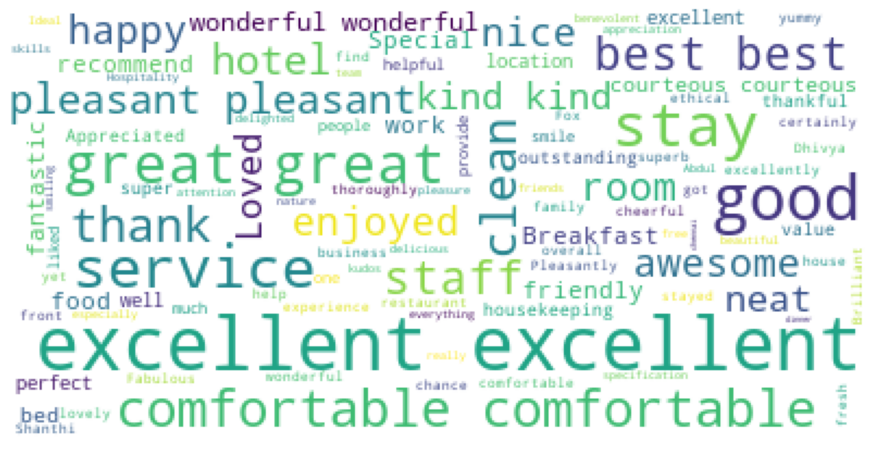

In [90]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordcloudstr=' '.join(pos_bwords)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(wordcloudstr)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#A wordcloud of positive sentiments among the customers. Most of them talk about pleasant stay, good food, good service
# and cleanliness; the main things that a potential customer would typically look for

In [91]:
#Lets repeat this process of bigrams and wordcloud with the negative reviews
bigramwords = []
for i in range(0,len(neg_df)):
    string_bigrams = bigrams(neg_df['Reviews1'][i].split(' '))
    for grams in string_bigrams:        
        str1 = ' '.join(grams)
        bigramwords.append(str1)

sid_obj = SentimentIntensityAnalyzer() 
neg_bwords = []

for i in range(0,len(bigramwords)):
    sentiment_dict = sid_obj.polarity_scores(bigramwords[i]) 
    #if sentiment_dict['compound'] >= 0.05 : 
    if(sentiment_dict['compound'] < 0):
        neg_bwords.append(bigramwords[i])

neg_bwords
#Some of the stronger negative bigrams are listed below

['speak angry',
 'angry taste',
 'also dead',
 'dead time',
 'phone cut',
 'cut dry',
 'bit harsh',
 'harsh Take',
 'Take leave',
 'leave attitude',
 'become frustrated',
 'frustrated behalf',
 'differently negative',
 'negative impact',
 'feel stressed',
 'stressed frustrated',
 'frustrated sweet',
 'weeks rude',
 'rude uneducated',
 'uneducated unprofessional',
 'unprofessional staff',
 'describe bad',
 'bad hotel',
 'staff rude',
 'rude however',
 'manager rude',
 'rude social',
 'people unprofessional',
 'unprofessional lacked',
 'staff bother',
 'bother look',
 'us dirt',
 'dirt disturbing',
 'disturbing food',
 'nothing special',
 'stay disappointed',
 'disappointed stayed',
 'beyond bored',
 'bored breakfast',
 'taste worst',
 'worst taste',
 'taste poor',
 'poor stay',
 'quality worst',
 'worst Worst',
 'Worst restaurants',
 'taste worst',
 'worst ']

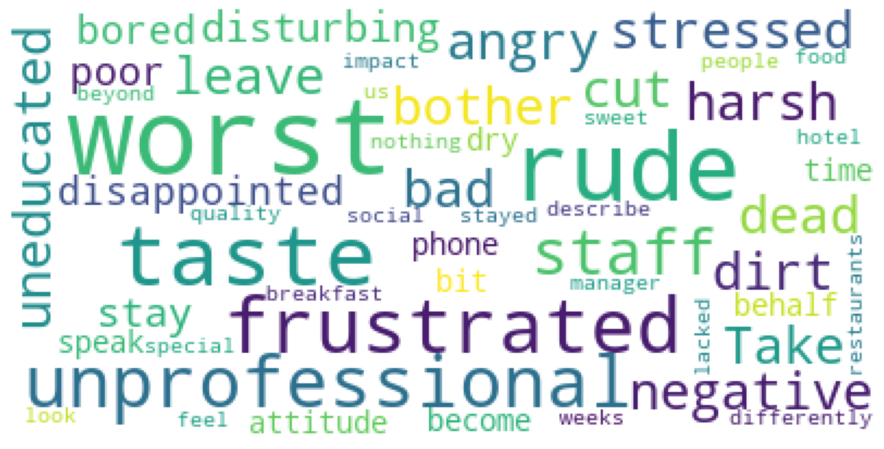

In [92]:
wordcloudstr=' '.join(neg_bwords)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(wordcloudstr)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# A wordcloud of the negative reviews convey that some of the customers were upset with unprofessional staff and bad food taste,
# 

In [99]:
#Lets reconfirm our sentiment analysis by extracting a little more information with trigrams. We only take the 
# stronger sentiment positive trigrams in the below code
from nltk import trigrams

trigramwords = []
for i in range(0,len(pos_df)):
    string_trigrams = trigrams(pos_df['Reviews1'][i].split(' '))
    for grams in string_trigrams:        
        str1 = ' '.join(grams)
        trigramwords.append(str1)
trigramwords  

sid_obj = SentimentIntensityAnalyzer() 
pos_twords = []

for i in range(0,len(trigramwords)):
    sentiment_dict = sid_obj.polarity_scores(trigramwords[i]) 
    #if sentiment_dict['compound'] >= 0.05 : 
    if(sentiment_dict['compound'] > 0.5):
        pos_twords.append(trigramwords[i])

pos_twords
#As indicated in the bigrams analysis, most customers were happy with the rooms, breakfast, overall service, 
# yummy food and cleanliness

['tour chennai fantastic',
 'chennai fantastic stay',
 'fantastic stay Rooms',
 'Recommended Overall good',
 'bathrooms neat clean',
 'neat clean Functional',
 'extra bed comfortable',
 'bed comfortable Breakfast',
 'Breakfast dinner yummy',
 'dinner yummy ',
 'persons done excellent',
 'done excellent services',
 'excellent services Timely',
 'Timely got best',
 'got best services',
 'best services Especially',
 'well disciplines Thanks',
 'team given best',
 'given best great',
 'best great work',
 'great work ',
 'rooms good clean',
 'good clean room',
 'circumstances safe good',
 'safe good stay',
 'scenarios like safety',
 'like safety paramount',
 'minus mentioned perfect',
 'mentioned perfect people',
 'perfect people spend',
 'could certainly better',
 'certainly better Overall',
 'would want comfortable',
 'want comfortable stay',
 'comfortable stay ',
 'days family awesome',
 'family awesome stay',
 'awesome stay food',
 'good n pleasant',
 'n pleasant overall',
 'pleasant ov

In [100]:
trigramwords = []
for i in range(0,len(neg_df)):
    string_trigrams = trigrams(neg_df['Reviews1'][i].split(' '))
    for grams in string_trigrams:        
        str1 = ' '.join(grams)
        trigramwords.append(str1)
trigramwords  

sid_obj = SentimentIntensityAnalyzer() 
neg_twords = []

for i in range(0,len(trigramwords)):
    sentiment_dict = sid_obj.polarity_scores(trigramwords[i]) 
    #if sentiment_dict['compound'] >= 0.05 : 
    if(sentiment_dict['compound'] < 0):
        neg_twords.append(trigramwords[i])

neg_twords
#Most of the customers with negative reviews indicated attitude of the staff, average tasting food 

['man speak angry',
 'speak angry taste',
 'angry taste normal',
 'normal also dead',
 'also dead time',
 'dead time house',
 'took phone cut',
 'phone cut dry',
 'cut dry bit',
 'dry bit harsh',
 'bit harsh Take',
 'harsh Take leave',
 'Take leave attitude',
 'leave attitude industry',
 'hence become frustrated',
 'become frustrated behalf',
 'frustrated behalf differently',
 'behalf differently negative',
 'differently negative impact',
 'negative impact could',
 'staff feel stressed',
 'feel stressed frustrated',
 'stressed frustrated sweet',
 'frustrated sweet corn',
 'two weeks rude',
 'weeks rude uneducated',
 'rude uneducated unprofessional',
 'uneducated unprofessional staff',
 'unprofessional staff social',
 'begin describe bad',
 'describe bad hotel',
 'bad hotel staff',
 'hotel staff rude',
 'staff rude however',
 'rude however housekeeping',
 'staff manager rude',
 'manager rude social',
 'rude social skills',
 'speak people unprofessional',
 'people unprofessional lacked',

In [101]:
!pip install textblob


     |████████████████████████████████| 636 kB 7.7 MB/s eta 0:00:01


In [108]:
from textblob import TextBlob


for i in range(0,len(neg_twords)):
    blob = TextBlob(neg_twords[i])
    #print(blob)
    if(blob.noun_phrases != []):
        print(blob.noun_phrases)

#Lets also extract the phrases that contain nouns so we can get some more specifics about what pleased or 
#disappointed the customers. Again most customers with negative reviews indicated bad hotel staff and bad taste of 
# food

['angry taste']
['angry taste']
['dead time']
['dead time house']
['dry bit']
['dry bit']
['attitude industry']
['negative impact']
['negative impact']
['sweet corn']
['weeks rude']
['weeks rude']
['unprofessional staff']
['unprofessional staff']
['bad hotel']
['bad hotel staff']
['hotel staff rude']
['staff rude']
['staff manager rude']
['manager rude']
['social skills']
['people unprofessional']
['people unprofessional']
['staff bother look']
['bother look']
['disturbing food']
['disturbing food']
['food taste']
['improve']
['breakfast taste']
['taste quality']
['worst']
['worst']
['worst', 'restaurants service']


In [111]:
pos_df.head()

,index,Unnamed: 0,Review,Reviews1,Sentiment
0,0,0,We visited for temple tour from chennai had a ...,visited temple tour chennai fantastic stay Roo...,0.8074
1,1,1,The rooms and bathrooms are neat and clean. Fu...,rooms bathrooms neat clean Functional hotel ke...,0.5499
2,2,2,We stayed last one month due to lock down felt...,stayed last one month due lock felt home fell ...,0.8740
3,3,3,House keeping persons were done to excellent s...,House keeping persons done excellent services ...,0.9755
4,4,4,"Stayed at redfox Hotel on transit, room was cl...",Stayed redfox Hotel transit room clean COVID m...,0.7650


In [115]:
_4grams = []
for i in range(0,len(pos_df)):
    ngram_object = TextBlob(pos_df['Reviews1'][i])
    ngrams = ngram_object.ngrams(n=4) # Computing Bigrams
    for grams in ngrams:        
        str1 = ' '.join(grams)
        _4grams.append(str1)
#print(_4grams)

for i in range(0,len(_4grams)):
    blob = TextBlob(_4grams[i])
    #print(blob)
    if(blob.noun_phrases != []):
        print(blob.noun_phrases)
#Most customers with positive reviews indicated they were happy with the overall service, cleanliness, friendly staff
#covid measures being taken and tasty food

['temple tour chennai']
['temple tour chennai']
['tour chennai']
['rooms']
['rooms']
['rooms']
['rooms']
['standard common places']
['standard common places']
['common places', 'recommended']
['recommended overall']
['recommended overall']
['recommended overall', 'hospitality']
['overall', 'hospitality keep']
['hospitality keep read']
['rooms bathrooms neat']
['bathrooms neat', 'functional']
['functional']
['functional', 'hotel kettle']
['functional', 'hotel kettle tea']
['hotel kettle tea coffee']
['kettle tea coffee rooms']
['tea coffee rooms']
['coffee rooms', 'extra bed']
['extra bed']
['extra bed', 'breakfast']
['breakfast']
['breakfast']
['breakfast']
['low occupancy']
['low occupancy levels']
['low occupancy levels hotel']
['occupancy levels hotel']
['levels hotel', 'ample car']
['ample car']
['ample car']
['due lock']
['day staff']
['day staff members']
['day staff members']
['staff members', 'especially']
['especially front']
['especially front']
['especially front', 'office s

['office manager', 'selva']
['selva']
['selva']
['reservation restaurant']
['reservation restaurant good']
['reservation restaurant good']
['restaurant good']
['fast spread']
['fast spread']
['fast spread']
['good lot']
['good lot varieties']
['good lot varieties', 'tried']
['lot varieties', 'tried mutton']
['tried mutton']
['tried mutton']
['mutton']
['good value']
['good value money']
['good value money']
['value money', 'small fitness']
['small fitness centre']
['small fitness centre']
['fitness centre']
['due lack']
['great brief stopover', 'trichy']
['brief stopover', 'trichy']
['trichy']
['trichy']
['particularly']
['particularly']
['particularly', 'suitable business']
['particularly', 'suitable business']
['suitable business', 'great breakfast']
['great breakfast options']
['great breakfast options']
['breakfast options', 'comfortable rooms']
['comfortable rooms', 'decent']
['comfortable rooms', 'decent']
['decent']
['decent']
['due hotel']
['bus interchange']
['distance railway

['extra amenities']
['extra amenities toiletries']
['extra amenities toiletries']
['amenities toiletries']
['courteous gesture']
['courteous gesture']
['courteous gesture']
['courteous staff']
['courteous staff']
['courteous staff']
['hotel friends']
['hotel friends relatives']
['hotel friends relatives', 'regards']
['room spic span']
['spic span', 'clean toilet']
['clean toilet wth']
['clean toilet wth']
['toilet wth', 'soft mattress']
['soft mattress']
['soft mattress', 'fast qualifies']
['fast qualifies']
['fast qualifies', 'excellent room']
['excellent room']
['excellent room', 'fox']
['fox']
['fox', 'trichy']
['fox', 'trichy']
['trichy']
['trichy', 'dhivya']
['dhivya']
['dhivya']
['dhivya']
['various places']
['various places']
['various places', 'trichy']
['trichy keep']
['trichy keep']
['trichy keep', 'good work']
['keep', 'good work']
['good work', 'fox']
['really', 'redfox']
['redfox']
['redfox']
['redfox']
['time hotel']
['time hotel']
['time hotel', 'good service']
['good se

In [ ]:
#TO sum up, on the positive aspect, the hotel scores in cleanliness. There's mixed reviews for attitude of the staff 
# as different customers may have different experiences. Most of the customers seem to not have a problem with food 
# and overall service. 
#Depending on what we look for for a pleasant hotel stay, such reviews will help us make an informed decision